In [19]:
# figサイズのテンプレート
template1=(15,6)
exDataIsAll=True

import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt

# DATA collectiong

## get area ID

In [20]:
import pandas as pd
PATH = '/Users/shin/Documents/onedrive-移行2024年5月1日/00_project/01_kurashiki_collecting_externaldata/csv_data/meshID/ID_kofu_zentai.csv'
df = pd.read_csv(PATH)
print(df.head())

# KEY_CODEを追加していく
areas = []
for area in df['code']:
    # print(area)
    areas.append(area)

print()
# print(f'{len(areas)} areas in total：{areas}')

# SQLで送信するようにデータを加工
areas_str=''
for k in areas:
    areas_str+=(str(k)+',')
areas_str=areas_str[:-1]  #最後の一文字に余分なカンマが入っているのでその部分を除いて変数を更新
areas_list = areas_str.split(',')

print(f'{len(areas_list)} areas in total：{areas_list}')

        code  Unnamed: 1
0  533845161         NaN
1  533845154         NaN
2  533845153         NaN
3  533845152         NaN
4  533845151         NaN

1147 areas in total：['533845161', '533845154', '533845153', '533845152', '533845151', '533845344', '533845343', '533845342', '533845341', '533845334', '533845333', '533845332', '533845331', '533845364', '533845363', '533845362', '533845361', '533845354', '533845353', '533845352', '533845351', '533845404', '533845403', '533845402', '533845401', '533845264', '533845263', '533845262', '533845261', '533845254', '533845253', '533845252', '533845251', '533845273', '533845271', '533845304', '533845324', '533845323', '533845322', '533845321', '533845314', '533845313', '533845312', '533845504', '533845503', '533845502', '533845501', '533854594', '533845524', '533845523', '533854592', '533845522', '533845521', '533845514', '533845513', '533845512', '533845511', '533845544', '533845543', '533845542', '533845541', '533845534', '533845533', '53384553

## POP data desiplay for checking


## 甲府市

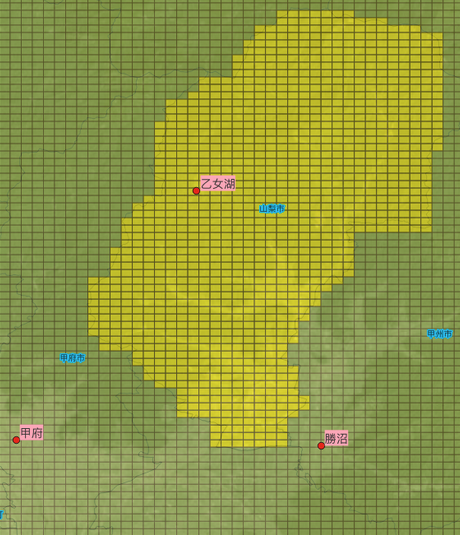

In [21]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt

#----------------------------------------------
# 訓練期間とテスト期間を日付で指定
train_start_date_test   = '2016-01-01 00:00:00'
train_end_date_test     = '2023-06-30 23:59:59'
test_start_date_test    = '2023-07-01 00:00:00'
test_end_date_test      = '2023-07-11 23:59:59'
#----------------------------------------------

name_trainPeriod='    Train('+train_start_date_test[0:10]+':'+train_end_date_test[0:10]+')'
print(name_trainPeriod)
name_testPeriod='    Test('+test_start_date_test[0:10]+':'+test_end_date_test[0:10]+')'
print(name_testPeriod)

print('SQL接続中...')

# データベースの接続情報
connection_config = {
    'user': 'shin',
    'password': 'shin_password',
    'port': '5432',
    'database': 'mobaku_base',
    'host': '10.33.230.198'
}
connection = psycopg2.connect(**connection_config)

with connection.cursor() as cursor:
    cursor.execute("SET pg_strom.enabled=off;")
    connection.commit()

# SQLクエリでデータの範囲を設定
sql_query = f"""
SELECT datetime, SUM(population) AS total_population
FROM population_00000
WHERE mesh_id IN ({','.join(areas_list)})

AND datetime BETWEEN '{train_start_date_test}' AND '{test_end_date_test}'
GROUP BY datetime
ORDER BY datetime;
"""

print('____________________')
print('SQL接続完了')
print('denji計算中...')
df = pd.read_sql(sql=sql_query, con=connection)

# 日付をインデックスに設定
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

# 訓練データとテストデータに分割
df_train = df.loc[train_start_date_test:train_end_date_test]
df_test = df.loc[test_start_date_test:test_end_date_test]

# データフレームの表示（オプション）
print(df_train)
print(df_test)


    Train(2016-01-01:2023-06-30)
    Test(2023-07-01:2023-07-11)
SQL接続中...
____________________
SQL接続完了
denji計算中...


/var/folders/sz/wz3fwctj09n4x7hz4ry03tqh0000gn/T/ipykernel_7609/821373804.py:49: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql=sql_query, con=connection)


                     total_population
datetime                             
2016-01-01 00:00:00             33887
2016-01-01 01:00:00             33332
2016-01-01 02:00:00             34086
2016-01-01 03:00:00             33556
2016-01-01 04:00:00             33805
...                               ...
2023-06-30 19:00:00             25151
2023-06-30 20:00:00             25493
2023-06-30 21:00:00             26448
2023-06-30 22:00:00             26727
2023-06-30 23:00:00             27468

[65712 rows x 1 columns]
                     total_population
datetime                             
2023-07-01 00:00:00             27587
2023-07-01 01:00:00             28038
2023-07-01 02:00:00             27879
2023-07-01 03:00:00             27728
2023-07-01 04:00:00             27621
...                               ...
2023-07-11 19:00:00             25935
2023-07-11 20:00:00             26601
2023-07-11 21:00:00             26791
2023-07-11 22:00:00             27373
2023-07-11 23:00:00     

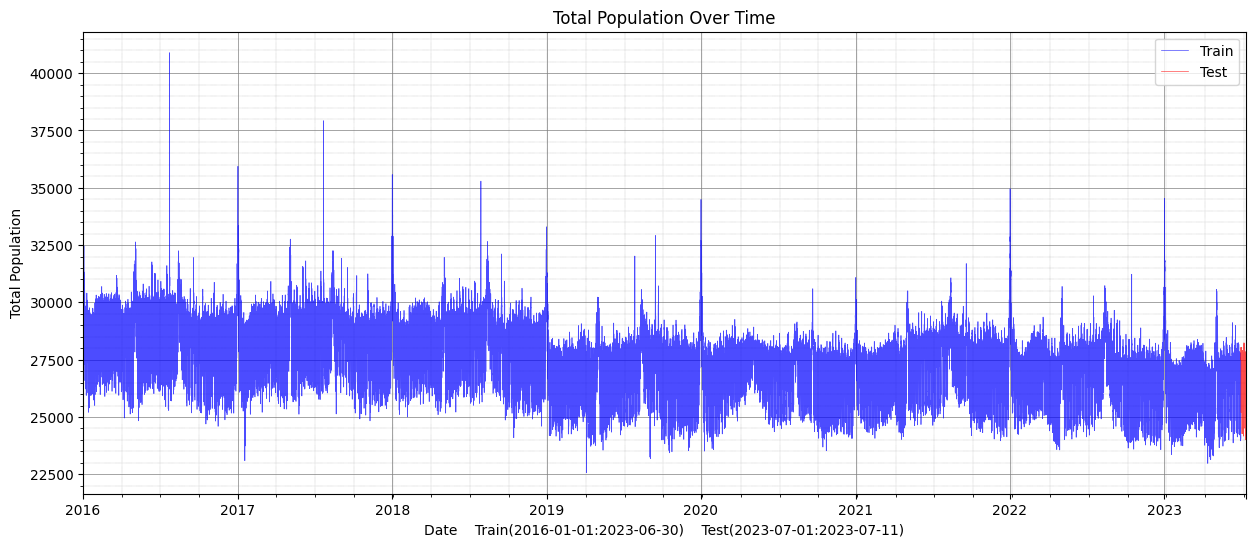

In [22]:
# グラフの描画
plt.figure(figsize=template1)
df_train['total_population'].plot(label='Train', linewidth='0.5',color='blue', alpha=0.7)
df_test['total_population'].plot(label='Test', linewidth='0.5',color='red', alpha=0.7)
plt.xlabel('Date'+name_trainPeriod+name_testPeriod)
plt.ylabel('Total Population')
plt.title('Total Population Over Time')
plt.legend()

# 主グリッドの設定
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
# 補助グリッドの設定
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='gray')

plt.show()